In [36]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

new_wine_data = pd.read_csv("Resources/sample_data.csv")
new_common_wine = new_wine_data[["variety", "price", "points", "country", 'description', 'province','region_1', 'region_2','winery']]

In [37]:
# Make new dataframe with common wine varities
cabernet_sauvignon_df = new_common_wine.loc[new_common_wine['variety'] =="Cabernet Sauvignon"]
chardonnay_df =new_common_wine.loc[new_common_wine['variety'] == "Chardonnay"] 
malbec_df =new_common_wine.loc[new_common_wine['variety'] == "Malbec"]
merlot_df =new_common_wine.loc[new_common_wine['variety'] == "Merlot"] 
pinot_grigio_df= new_common_wine.loc[new_common_wine['variety'] =="Pinot Grigio"] 
pinot_gris_df= new_common_wine.loc[new_common_wine['variety'] =="Pinot Gris"]
pinot_noir_df= new_common_wine.loc[new_common_wine['variety'] =="Pinot Noir"] 
riesling_df =new_common_wine.loc[new_common_wine['variety'] == "Riesling"]
sauvignon_blanc_df = new_common_wine.loc[new_common_wine['variety'] == "Sauvignon Blanc"]



all_wines = [cabernet_sauvignon_df, chardonnay_df, malbec_df, merlot_df, pinot_grigio_df, pinot_noir_df, riesling_df, sauvignon_blanc_df]
all_wines_df= pd.concat(all_wines)
all_wines_df.head()
cabernet_score=cabernet_sauvignon_df['points'].mean()
chardonnay_score=chardonnay_df['points'].mean()
malbec_score=malbec_df['points'].mean()
merlot_score=merlot_df['points'].mean()
grigio_score=pinot_grigio_df['points'].mean()
noir_score=pinot_noir_df['points'].mean()
riesling_score=riesling_df['points'].mean()
sauvignon_score=sauvignon_blanc_df['points'].mean()
all_wine_scores = [cabernet_score, chardonnay_score, malbec_score, merlot_score, grigio_score, noir_score, riesling_score, sauvignon_score]

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

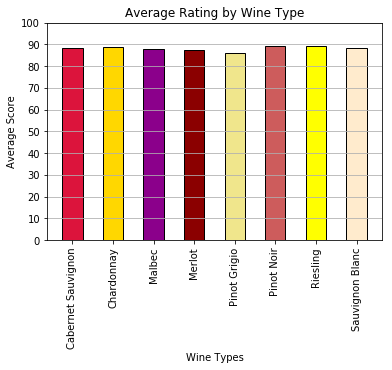

In [38]:
names= ['Cabernet Sauvignon', 'Chardonnay', 'Malbec','Merlot', 'Pinot Grigio', 'Pinot Noir','Riesling', 'Sauvignon Blanc']
my_colors = ["crimson", "gold", "darkmagenta", "darkred", "khaki", "indianred", "yellow", "blanchedalmond"]

    

plt.bar(names,all_wine_scores, width=.5,color=my_colors,edgecolor="k")
plt.title("Average Rating by Wine Type")
plt.xlabel("Wine Types")
plt.ylabel("Average Score")


y=[0,10,20,30,40,50,60,70,80,90,100]
plt.yticks(y)
plt.grid(axis='y')
plt.xticks(rotation=90)

#plt.savefig(“../Images/IceCreamSales.png”)

In [39]:
unique_winery=all_wines_df.groupby(['winery']).count()
top_wineries=pd.DataFrame(all_wines_df).sort_values(["points"], ascending=False)

#top_big_spenders=pd.DataFrame(big_spenders).sort_values(["Price"], ascending=False)

Text(0,0.5,'Prices')

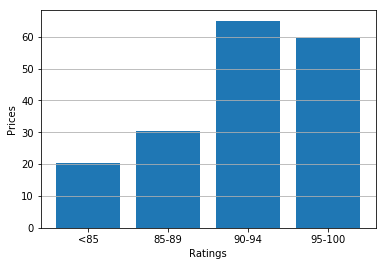

In [40]:
rating = [0,86,90,95,100]
rating_bracket = ['<85','85-89','90-94','95-100']

# Add column of bins based on Age
top_wineries["Rating"]= pd.cut(top_wineries["points"],rating, labels=rating_bracket)

rating_per_group=top_wineries.groupby("Rating")["points"].count()
rating_points=top_wineries.groupby("Rating")["points"].sum()

total_purchase_price=top_wineries.groupby("Rating")["price"].sum()

top_winery_by_rating=pd.DataFrame(rating_per_group, index=rating_bracket)
top_winery_by_rating["Average Purchase Price"]=(total_purchase_price)/top_winery_by_rating["points"]


b=top_winery_by_rating['Average Purchase Price']
plt.bar(rating_bracket,b)
#rating by rating bin
plt.grid(axis='y')
plt.xlabel("Ratings")
plt.ylabel("Prices")
#plt.savefig(“../Images/IceCreamSales.png”)

In [41]:
most_expensive_wineries=pd.DataFrame(all_wines_df).sort_values(["price"], ascending=False)

Text(0,0.5,'Ratings')

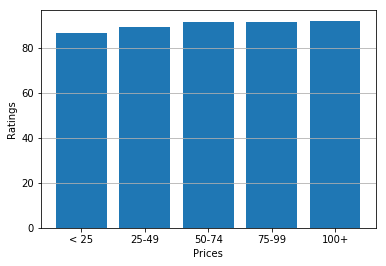

In [42]:
price = [0,24,49,74,99,2000]
price_bracket = ['< 25','25-49','50-74','75-99','100+']

# Add column of bins based on Age
top_wineries["Prices"]= pd.cut(top_wineries["price"],price, labels=price_bracket)

prices_per_group=top_wineries.groupby("Prices")["price"].count()
total_prices=top_wineries.groupby("Prices")["price"].sum()

total_purchase_points=top_wineries.groupby("Prices")["points"].sum()

top_winery_by_price=pd.DataFrame(prices_per_group, index=price_bracket)
top_winery_by_price["Average Score"]=(total_purchase_points)/prices_per_group
a=top_winery_by_price['Average Score']

plt.bar(price_bracket,a)
plt.xlabel("Prices")
plt.grid(axis='y')
plt.ylabel("Ratings")
#rating by price bin

#plt.savefig(“../Images/IceCreamSales.png”)